# Scoring
#### Gros probleme, la variable fraude a seulement 7246 on peut avoir un modele bete que previse toujours 0....

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\autorisations.csv")

In [3]:
data.head()

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,...,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0,840,02/12/2003,17:47:52,02/12/2003,15,5812,69.25,0,0,...,69.25,69.25,1,1,1,1,1,1,1,1
1,1,158,25/11/2003,06:00:20,25/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1
2,2,826,12/11/2003,14:10:57,12/11/2003,15,5211,516.95,0,0,...,516.95,516.95,1,1,1,1,1,1,1,1
3,3,840,07/11/2003,03:41:55,07/11/2003,14,7399,0.01,0,0,...,0.01,0.01,1,1,1,1,1,1,1,1
4,4,158,23/11/2003,05:07:03,23/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1


In [4]:
data.shape

(1151432, 25)

In [5]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [6]:
data["fraude"].sum()/len(data)

0.006293033370620237

In [7]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [8]:
info_df_num = data.describe()
info_types = pd.DataFrame(data.dtypes)

In [9]:
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(data)

print(info_df_num_2)

                   variables  Nb value distinct  Nb value missing  \
0                      Carte             198044                 0   
1                       Pays                167                 0   
2                    CodeRep                 15                 0   
3                        MCC                661                 0   
4                    Montant              81202                 0   
5                     fraude                  2                 0   
6    FM_Velocity_Condition_3                 47                 0   
7    FM_Velocity_Condition_6                 82                 0   
8   FM_Velocity_Condition_12                111                 0   
9   FM_Velocity_Condition_24                130                 0   
10                  FM_Sum_3             109836                 0   
11                  FM_Sum_6             115524                 0   
12                 FM_Sum_12             121192                 0   
13                 FM_Sum_24      

In [10]:
list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

   variables  Nb value distinct  Nb value missing
0       Date                243                 0
1      Heure              85697                 0
2  dateheure                243                 0


In [11]:
data["Heure"] = data["Heure"].str.split(':', expand=True)[0]
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')
data["Month"] = data["Date"].dt.month
data["Month"] = data["Month"].astype('object')
data["CodeRep"]=np.where(data["CodeRep"] == 0,1,0)
continents = pd.read_excel("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\continents.xlsx", index_col = "Code numérique")
data["Continent"] = data['Pays'].map(continents["Continent"])
data["Continent"] = np.where(data["Pays"]==891, 'Europe', data["Continent"])
data["Continent"] = np.where(data["Pays"]==530, 'Amérique du Nord', data["Continent"])
data["Continent"] = np.where((data["Pays"]==999)|(data["Pays"]==900), 'Unknown', data["Continent"])
data["FD"] = data['Pays'].map(continents["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Europe'), 0.502679705619812, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & ((data["Continent"]=='Asie')|(data["Continent"]=='Océanie')), 0.350481420755386, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Afrique'), 0.1582290828228, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & ((data["Continent"]=='Amérique du Nord')|(data["Continent"]=='Amérique du Sud')), 0.324424803256989, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Unknown'), 0.319519817829132, data["FD"])

In [17]:
data=data.loc[data['Montant']<100000]
data=data.loc[data['FM_Sum_3']<400000]
data=data.loc[data['FM_Sum_6']<400000]
data=data.loc[data['FM_Sum_12']<400000]

# Division of test and train data.
Is it necessary to do it before analysing for possible seasonalities or country risk?

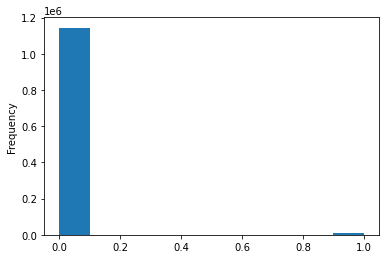

In [18]:
data["fraude"].plot(kind = 'hist');

In [19]:
X = data.drop(columns=["fraude","Carte", "Date", "dateheure", "MCC"])
Y = data["fraude"]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, stratify=Y)
train = X_train.join(Y_train)

## Is there a country specific risk involved?

In [21]:
summa= train.groupby("Pays").sum()[["fraude"]]
summa.sort_values(by="fraude")

,fraude
Pays,
8,0
524,0
512,0
508,0
498,0
...,...
56,375
380,513
826,644


In [22]:
counts = pd.Series(train["Pays"]).value_counts()
counts = pd.DataFrame(counts)
counts = counts.rename(columns={"Pays":"NTrans"})

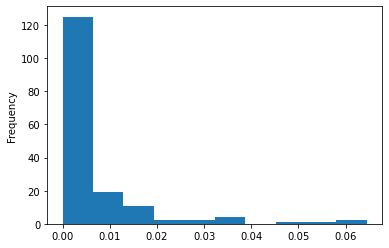

In [23]:
cmerged = pd.merge(counts,summa,left_index=True, right_index=True)
cmerged.reset_index(inplace=True)
cmerged = cmerged.rename(columns={"index":"Pays"})
cmerged["Fratio"] = cmerged["fraude"]/cmerged["NTrans"]
cmerged["Fratio"].plot(kind = 'hist');

In [24]:
sum(cmerged["Fratio"]>0.025)

10

In [25]:
cmerged[(cmerged["Fratio"]>0.025)]

,Pays,NTrans,fraude,Fratio
13,36,5659,156,0.027567
14,76,5191,254,0.048931
17,792,4229,251,0.059352
38,356,1845,49,0.026558
53,188,830,29,0.034940
64,608,595,22,0.036975
80,320,242,9,0.037190
97,862,125,7,0.056000
98,218,124,8,0.064516
104,690,93,3,0.032258


D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


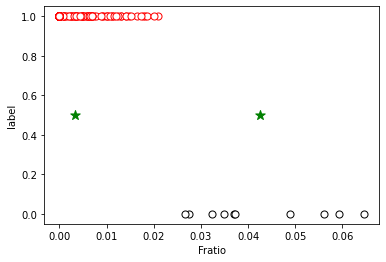

In [26]:
kmeans = KMeans(n_clusters=2)
cmerged['label'] = kmeans.fit_predict(cmerged[['Fratio']])
ax = cmerged[cmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
cmerged[cmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [27]:
cmerged[cmerged['label']==1]

,Pays,NTrans,fraude,Fratio,label
0,840,135854,665,0.004895,1
1,724,128524,873,0.006793,1
2,56,115644,375,0.003243,1
3,826,106270,644,0.006060,1
4,380,70451,513,0.007282,1
...,...,...,...,...,...
162,795,1,0,0.000000,1
163,275,1,0,0.000000,1
164,418,1,0,0.000000,1
165,328,1,0,0.000000,1


In [28]:
# K-Means and a 0.025 threshold level bring the same result

#### And the high risk countries are: Australia (36), Brasil (76), Turkey (792), India (356), Costa Rica (188), Philippines (608), Taiwan (158), Guatemala (320), Ecuador (218), Venezuela (862).

In [29]:
X_train["Pays_ris"]=0

In [30]:
X_train["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_train['AUX1'] = np.where(np.logical_or(X_train.Pays==36, X_train.Pays==76, X_train.Pays==792)
                               ,1, 0)
X_train['AUX2'] = np.where(np.logical_or(X_train.Pays==356, X_train.Pays==188, X_train.Pays==608)
                               ,1, 0)
X_train['AUX3'] = np.where(np.logical_or(X_train.Pays==158, X_train.Pays==320, X_train.Pays==218)
                               ,1, 0)
X_train['AUX4'] = np.where(X_train.Pays==862,1,0)
X_train['AUX12'] = np.where(np.logical_or(X_train.AUX1==1, X_train.AUX2==1)
                               ,1, 0)
X_train['Pays_ris'] = np.where(np.logical_or(X_train.AUX12==1, X_train.AUX3==1, X_train.AUX4==1)
                               ,1, 0)
X_train = X_train.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [31]:
X_test["Pays_ris"]=0
X_test['AUX1'] = np.where(np.logical_or(X_test.Pays==36, X_test.Pays==76, X_test.Pays==792)
                               ,1, 0)
X_test['AUX2'] = np.where(np.logical_or(X_test.Pays==356, X_test.Pays==188, X_test.Pays==608)
                               ,1, 0)
X_test['AUX3'] = np.where(np.logical_or(X_test.Pays==158, X_test.Pays==320, X_test.Pays==218)
                               ,1, 0)
X_test['AUX4'] = np.where(X_test.Pays==862,1,0)
X_test['AUX12'] = np.where(np.logical_or(X_test.AUX1==1, X_test.AUX2==1)
                               ,1, 0)
X_test['Pays_ris'] = np.where(np.logical_or(X_test.AUX12==1, X_test.AUX3==1, X_test.AUX4==1)
                               ,1, 0)
X_test = X_test.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [32]:
sum(X_train["Pays_ris"])/len(X_train)

0.017640176625091035

In [33]:
sum(X_test["Pays_ris"])/len(X_test)

0.017291491763888486

## Verifying if there are clusters in the hours of the day.

In [34]:
sumh= train.groupby("Heure").sum()[["fraude"]]
sumh.sort_values(by="fraude")

,fraude
Heure,
05,73
06,75
07,83
04,88
08,96
03,105
02,134
09,134
01,139


In [35]:
counth = pd.Series(train["Heure"]).value_counts()
counth = pd.DataFrame(counth)
counth = counth.rename(columns={"Heure":"NTrans"})

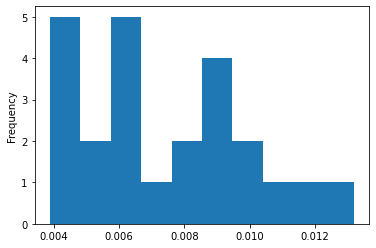

In [36]:
hmerged = pd.merge(counth, sumh, left_index=True, right_index=True)
hmerged.reset_index(inplace=True)
hmerged = hmerged.rename(columns={"index":"Heure"})
hmerged["Fratio"] = hmerged["fraude"]/hmerged["NTrans"]
hmerged["Fratio"].plot(kind = 'hist');

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


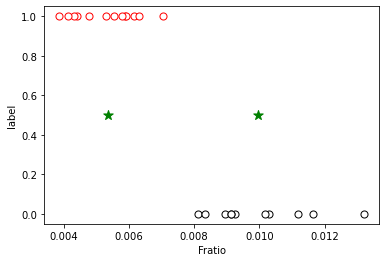

In [37]:
kmeans = KMeans(n_clusters=2)
hmerged['label'] = kmeans.fit_predict(hmerged[['Fratio']])
ax = hmerged[hmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
hmerged[hmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [38]:
hmerged[hmerged['label']==1]

,Heure,NTrans,fraude,Fratio,label
0,16,66291,351,0.005295,1
1,15,65849,315,0.004784,1
2,17,65110,383,0.005882,1
3,14,57765,321,0.005557,1
4,18,55320,327,0.005911,1
5,11,54804,242,0.004416,1
6,12,53133,328,0.006173,1
7,13,48632,282,0.005799,1
8,10,47088,204,0.004332,1
10,09,34598,134,0.003873,1


Fraudes are more frequent during night hours even if it is possible that they are constant during the day and the thing which changes the most is the number of transactions during the day.

## Checking possible seasonalities.

In [39]:
summ= train.groupby("Month").sum()[["fraude"]]
summ.sort_values(by="fraude")

,fraude
Month,
4,488
2,529
11,573
3,646
5,656
1,677
12,734
6,769


In [40]:
mcount = pd.Series(train["Month"]).value_counts()
mcount = pd.DataFrame(mcount)
mcount = mcount.rename(columns={"Month":"NTrans"})

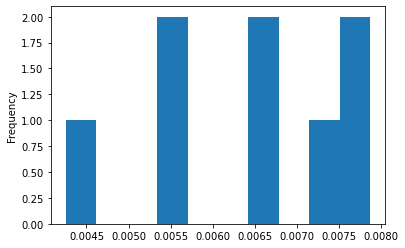

In [41]:
mmerged = pd.merge(mcount, summ, left_index=True, right_index=True)
mmerged.reset_index(inplace=True)
mmerged = mmerged.rename(columns={"index":"Month"})
mmerged["Fratio"] = mmerged["fraude"]/mmerged["NTrans"]
mmerged["Fratio"].plot(kind = 'hist');

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


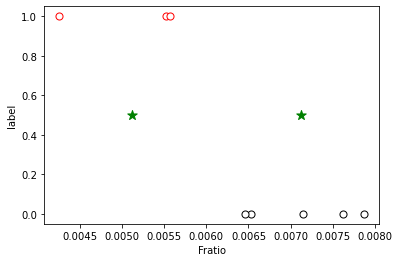

In [42]:
kmeans = KMeans(n_clusters=2)
mmerged['label'] = kmeans.fit_predict(mmerged[['Fratio']])
ax = mmerged[mmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
mmerged[mmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [43]:
mmerged[mmerged['label']==1]

,Month,NTrans,fraude,Fratio,label
0,5,118825,656,0.005521,1
1,4,114699,488,0.004255,1
5,2,95009,529,0.005568,1


In [44]:
mmerged[mmerged['label']==0]

,Month,NTrans,fraude,Fratio,label
2,6,107533,769,0.007151,0
3,3,98939,646,0.006529,0
4,12,96213,734,0.007629,0
6,11,88759,573,0.006456,0
7,1,86024,677,0.007870,0


In this case I can't see a difference in frauds given the month.

## Modelisation

In [45]:
X_train = X_train.drop(columns=["Heure","Month","Continent"]) # Can be held eventually
X_test = X_test.drop(columns=["Heure","Month", "Continent"]) # Can be held eventually

## Random Forest for base model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
from timeit import default_timer as timer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [41]:
# param_dict_bayes_RF = {
#     'n_estimators' : Integer(10,200),
#     'criterion': Categorical(['gini', 'entropy']), 
#     'max_depth': Integer(3,10),
#     'bootstrap':Categorical([True,False])}

# NB_ITER = 5

# opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

# start = timer()  
# opt.fit(X_train, Y_train)
# delais = timer()- start
# best_param_opti_bayes = opt.best_params_
# best_score_opti_bayes = opt.best_score_
# all_result_opti_bayes = opt.cv_results_
# print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
# print(" \n Durée de recherche en seconde :")
# print(delais)
# print("\n Paramètres optimaux : ")
# best_param_opti_bayes =opt.best_params_
# print(best_param_opti_bayes)
# best_score_opti_bayes = opt.best_score_
# print("\n Résultats  : " + str(best_score_opti_bayes))

In [42]:
# rf_clf = RandomForestClassifier(**opt.best_params_)

# rf_clf.fit(X_train,Y_train)

# #Calcul des métriques

# fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train)[:,1])
# roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

# fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test)[:,1])
# roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

# plt.figure()
# lw = 2
# plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
#          lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
# plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
#          lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Comparaison courve ROC Train ')
# plt.legend(loc="lower right")
# plt.show()



# ### COURBES PRECISION RAPPEL

# precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
#                                                                          rf_clf.predict_proba(X_train)[:,1])

# precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
#                                                                          rf_clf.predict_proba(X_test)[:,1])

# plt.figure()
# lw = 2
# plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
#          lw=lw, label='Train - RF')
# plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
#          lw=lw, label='Test - RF')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Comparaison courbe PRECISION / RAPPEL')
# plt.legend(loc="lower left")
# plt.show()

In [43]:
# importance_variable_rf = pd.DataFrame()
# importance_variable_rf["Variable"]= X_train.columns.tolist()
# importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

# importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

# print("Les 10 variables les plus importantes : \n")
# importance_variable_rf.head(10)

### Without country risk

In [47]:
X_train2 = X_train.drop(columns=["Pays_ris"]) # Can be held eventually
X_test2 = X_test.drop(columns=["Pays_ris"]) # Can be held eventually

In [49]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2337.3084000999997

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 8), ('n_estimators', 161)])

 Résultats  : 0.8118506437929076


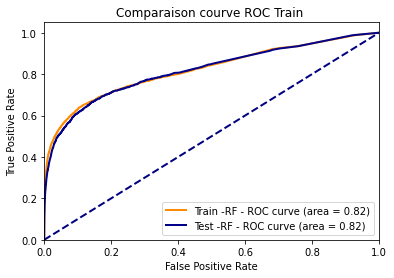

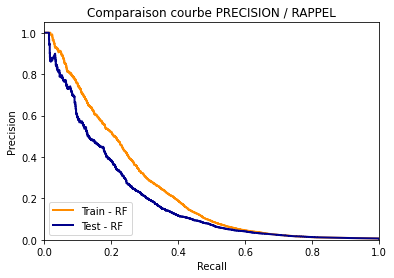

In [50]:
rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train2,Y_train)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train2)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
                                                                         rf_clf.predict_proba(X_train2)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [53]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train2.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
5,FM_Velocity_Condition_24,0.148670
9,FM_Sum_24,0.142235
4,FM_Velocity_Condition_12,0.104916
8,FM_Sum_12,0.102081
3,FM_Velocity_Condition_6,0.077726
7,FM_Sum_6,0.065147
2,FM_Velocity_Condition_3,0.057726
18,FD,0.041825
1,Montant,0.041258
6,FM_Sum_3,0.036072


<Figure size 504x504 with 0 Axes>

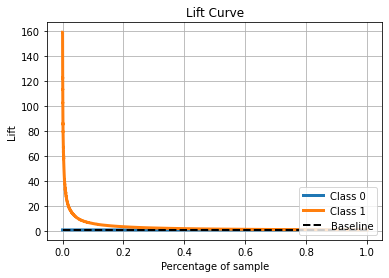

In [51]:
plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test2)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show()

In [54]:
res_modele=pd.DataFrame()
res_modele["Target"]=Y_test
res_modele["Proba_target"]=rf_clf.predict_proba(X_test2)[:,1]

res_modele.sort_values(by =["Proba_target"], inplace = True,ascending=False)

res_modele['QuantileRank']= pd.qcut(res_modele["Proba_target"], q = 5, labels = False)
res_modele.head(7)

,Target,Proba_target,QuantileRank
999600,1,0.738188,4
999601,1,0.730752,4
999608,1,0.721582,4
472787,1,0.712127,4
1110464,1,0.711481,4
472779,1,0.711332,4
999611,1,0.708912,4


In [55]:
agg_tmp=pd.DataFrame(res_modele.groupby('QuantileRank')['Target'].agg(['sum','count']))

agg_tmp.sort_values(by =["QuantileRank"], inplace = True,ascending=False)

print(agg_tmp)

               sum  count
QuantileRank             
4             1538  69067
3              216  67663
2              126  51408
1              153  74471
0              141  82821


In [56]:
agg_tmp["Precision"] = agg_tmp["sum"]/agg_tmp["count"]
agg_tmp["Proba_alatoire"]= Y_test.mean()
agg_tmp["lift"]=agg_tmp["Precision"]/agg_tmp["Proba_alatoire"]
agg_tmp["Part population cible"]=agg_tmp["sum"]/Y_test.sum()
agg_tmp["Part population"]=agg_tmp["count"]/Y_test.count()
print(agg_tmp)

               sum  count  Precision  Proba_alatoire      lift  \
QuantileRank                                                     
4             1538  69067   0.022268        0.006294  3.538232   
3              216  67663   0.003192        0.006294  0.507228   
2              126  51408   0.002451        0.006294  0.389440   
1              153  74471   0.002054        0.006294  0.326441   
0              141  82821   0.001702        0.006294  0.270507   

              Part population cible  Part population  
QuantileRank                                          
4                          0.707452         0.199945  
3                          0.099356         0.195880  
2                          0.057958         0.148823  
1                          0.070377         0.215589  
0                          0.064857         0.239762  


### Trying resampling techniques

In [58]:
over_sampler = SMOTE(k_neighbors=2)
X_res, Y_res = over_sampler.fit_resample(X_train2, Y_train)
print(f"Training target statistics: {Counter(Y_res)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 800930, 1: 800930})
Testing target statistics: Counter({0: 343256, 1: 2174})


In [59]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_res, Y_res)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
6453.647114800001

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 6), ('n_estimators', 164)])

 Résultats  : 0.8595681674512882


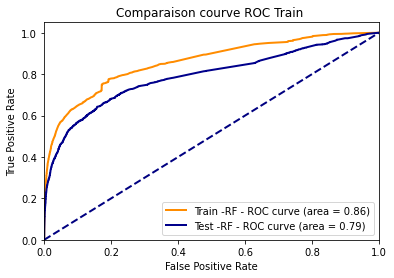

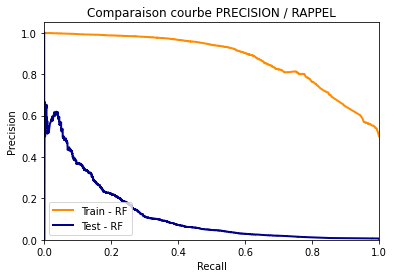

In [60]:
rf_clf = RandomForestClassifier(**opt.best_params_)
# rf_clf = RandomForestClassifier(bootstrap=True, criterion = "entropy", max_depth=8,n_estimators=199)
rf_clf.fit(X_res,Y_res)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_res, rf_clf.predict_proba(X_res)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_res,
                                                                         rf_clf.predict_proba(X_res)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [61]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_res.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
9,FM_Sum_24,0.204222
18,FD,0.125505
0,CodeRep,0.109439
8,FM_Sum_12,0.105540
7,FM_Sum_6,0.099255
5,FM_Velocity_Condition_24,0.087581
3,FM_Velocity_Condition_6,0.054700
4,FM_Velocity_Condition_12,0.051976
6,FM_Sum_3,0.049370
2,FM_Velocity_Condition_3,0.044271


<Figure size 504x504 with 0 Axes>

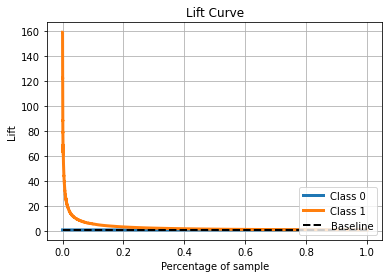

In [48]:
plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test2)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show();

In [49]:
res_modele=pd.DataFrame()
res_modele["Target"]=Y_test
res_modele["Proba_target"]=rf_clf.predict_proba(X_test2)[:,1]

res_modele.sort_values(by =["Proba_target"], inplace = True,ascending=False)

res_modele['QuantileRank']= pd.qcut(res_modele["Proba_target"], q = 5, labels = False)
res_modele.head(7)

,Target,Proba_target,QuantileRank
1110463,1,0.993002,4
130801,1,0.992729,4
883929,1,0.992671,4
472786,1,0.992490,4
182279,1,0.992237,4
237373,1,0.992154,4
472790,1,0.992123,4


In [51]:
agg_tmp=pd.DataFrame(res_modele.groupby('QuantileRank')['Target'].agg(['sum','count']))

agg_tmp.sort_values(by =["QuantileRank"], inplace = True,ascending=False)

print(agg_tmp)

               sum  count
QuantileRank             
4             1470  69012
3              183  58236
2              173  80008
1              197  69088
0              151  69086


In [52]:
agg_tmp["Precision"] = agg_tmp["sum"]/agg_tmp["count"]
agg_tmp["Proba_alatoire"]= Y_test.mean()
agg_tmp["lift"]=agg_tmp["Precision"]/agg_tmp["Proba_alatoire"]
agg_tmp["Part population cible"]=agg_tmp["sum"]/Y_test.sum()
agg_tmp["Part population"]=agg_tmp["count"]/Y_test.count()
print(agg_tmp)

               sum  count  Precision  Proba_alatoire      lift  \
QuantileRank                                                     
4             1470  69012   0.021301        0.006294  3.384490   
3              183  58236   0.003142        0.006294  0.499298   
2              173  80008   0.002162        0.006294  0.343568   
1              197  69088   0.002851        0.006294  0.453069   
0              151  69086   0.002186        0.006294  0.347286   

              Part population cible  Part population  
QuantileRank                                          
4                          0.676173         0.199786  
3                          0.084177         0.168590  
2                          0.079577         0.231619  
1                          0.090616         0.200006  
0                          0.069457         0.200000  


## Saleha code testing

In [90]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

In [71]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
search_grid={'n_estimators':[10,50,100,200,500,1000],'learning_rate':[0.01,.1,0.3,0.9,1], 'max_depth':[3,5,7,9]}
gbm=xgb.XGBClassifier(eval_metric='roc_auc', use_label_encoder=False, tree_method='gpu_hist', gpud_id=0)
search=GridSearchCV(estimator=gbm,param_grid=search_grid,scoring='roc_auc',n_jobs=-1,cv=crossvalidation)

search.fit(X_train2,Y_train)
search.best_params_

ValueError: 
All the 1200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:18] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:19] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:20] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:21] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:22] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:23] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:24] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:25] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:26] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:27] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:28] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:29] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:30] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:31] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:32] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:33] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:34] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:35] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:36] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:37] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:38] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:39] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:40] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:41] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:42] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:43] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:44] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:45] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:46] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:47] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:48] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:49] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:50] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:51] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:52] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:53] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:54] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:55] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:56] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:57] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:58] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:32:59] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:00] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:01] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:02] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:03] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:04] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:05] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:06] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:07] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:08] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:09] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:10] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:11] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:12] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:13] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:14] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:15] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:16] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:17] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:18] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:19] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:20] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:21] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:22] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:23] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:24] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:25] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:26] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:27] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:32] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:33] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:34] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:35] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:36] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:37] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:38] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:39] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:40] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:41] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:42] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:43] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:44] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:45] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:46] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:47] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:48] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:49] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:50] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:51] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:52] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:53] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:54] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:55] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:56] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:57] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:58] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:33:59] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:00] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:01] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:02] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:03] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:04] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:05] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:06] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:07] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:08] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:09] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:10] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:11] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:12] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:13] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:14] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:15] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:16] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:17] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:18] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:19] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:20] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:21] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:22] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:23] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:24] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:25] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:26] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:27] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:28] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:29] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:30] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:31] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:32] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:33] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:34] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:35] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:36] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:37] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:38] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:39] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:40] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:41] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:42] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:43] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:44] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:45] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:46] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:47] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:48] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:49] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:50] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:51] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:52] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:53] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:54] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:55] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:56] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:57] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:58] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:34:59] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:00] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:01] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:02] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:03] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:04] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:05] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:06] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:07] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:08] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:09] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:10] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:11] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:12] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:13] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:14] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:15] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:16] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:17] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:18] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:19] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:20] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:21] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:22] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:23] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:24] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:25] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:26] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:27] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:28] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:29] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:30] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:31] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:32] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:33] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:34] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:35] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:36] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:37] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:38] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:39] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:40] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:41] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:42] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:43] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\alepi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "D:\Users\alepi\anaconda3\lib\site-packages\xgboost\core.py", line 218, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [14:35:44] c:\ci\xgboost-split_1638290375667\work\src\common\common.h:157: XGBoost version not compiled with GPU support.


In [83]:
var_app = X_train2.columns.tolist()
NB_ITER = 5

In [101]:
param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gblinear','gbtree','dart']), #,'gbtree','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train2,Y_train)

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:47:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:47:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:47:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:47:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:47:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:47:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:48:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:49:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:49:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:49:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:49:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:49:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:49:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:52:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:55:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:55:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:58:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:00:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:03:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:03:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### 
 
 Durée de recherche en seconde :
1186.8788077999998

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('booster', 'dart'), ('label', 'FD'), ('learning_rate', 0.12531594966272885), ('objective', 'binary:logistic')])

 Résultats  : 0.8314080077065678
[16:07:07] WARNING: ..\src\learner

XGBClassifier(base_estimator=LogisticRegression(), base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', label='FD',
              learning_rate=0.12531594966272885, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

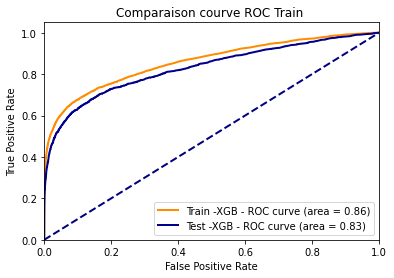

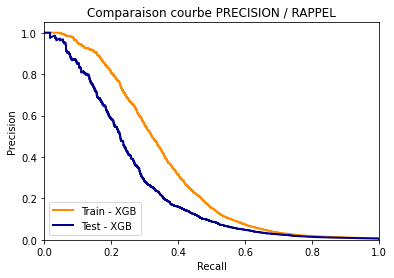

In [102]:
#Calcul des métriques

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(Y_train, xgb_clf.predict_proba(X_train2)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

plt.figure()
lw = 2
plt.plot(fpr_train_XGB, tpr_train_XGB, color='darkorange',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)
plt.plot(fpr_test_XGB, tpr_test_XGB, color='darkblue',
         lw=lw, label='Test -XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(Y_train,
                                                                         xgb_clf.predict_proba(X_train2)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(Y_test,
                                                                         xgb_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_XGB,precision_train_XGB, color='darkorange',
         lw=lw, label='Train - XGB')
plt.plot(recall_test_XGB,precision_test_XGB, color='darkblue',
         lw=lw, label='Test - XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

## Undersampling with Tomek links

In [103]:
from imblearn.under_sampling import TomekLinks
# Undersampling / Tomek Links

undersample = TomekLinks()
X_TL, Y_TL = undersample.fit_resample(X_train2, Y_train)

print(f"Training target statistics: {Counter(Y_TL)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 799052, 1: 5072})
Testing target statistics: Counter({0: 343256, 1: 2174})


In [104]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_TL, Y_TL)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
1549.6330469999994

 Paramètres optimaux : 
OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 9), ('n_estimators', 16)])

 Résultats  : 0.8154767859315456


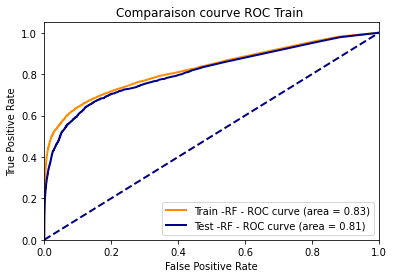

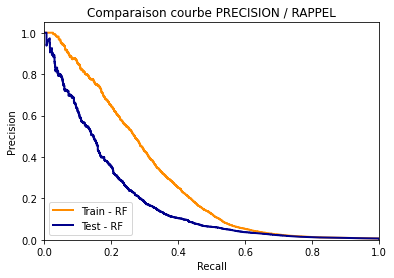

In [105]:
rf_clf = RandomForestClassifier(**opt.best_params_)
rf_clf.fit(X_TL,Y_TL)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_TL, rf_clf.predict_proba(X_TL)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_TL,
                                                                         rf_clf.predict_proba(X_TL)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [114]:
Y_pred=rf_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[343230     26]
 [  2074    100]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    343256
           1       0.79      0.05      0.09      2174

    accuracy                           0.99    345430
   macro avg       0.89      0.52      0.54    345430
weighted avg       0.99      0.99      0.99    345430



In [106]:
param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gblinear','gbtree','dart']), #,'gbtree','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_TL, Y_TL)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_TL,Y_TL)

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:21:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:21:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:24:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:24:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:26:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:28:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:28:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:30:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:30:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:33:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:33:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:33:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:37] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:34:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:35:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### 
 
 Durée de recherche en seconde :
982.6906110999989

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('booster', 'dart'), ('label', 'CodeRep'), ('learning_rate', 0.5033360949994636), ('objective', 'binary:logistic')])

 Résultats  : 0.8165589778854312
[17:38:18] WARNING: ..\src\lear

XGBClassifier(base_estimator=LogisticRegression(), base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', label='CodeRep',
              learning_rate=0.5033360949994636, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

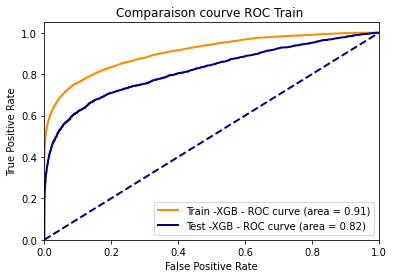

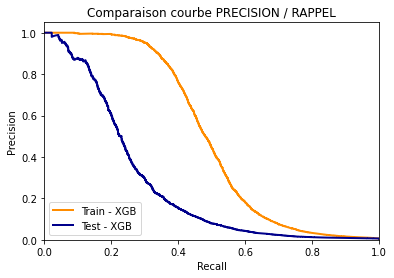

In [107]:
#Calcul des métriques

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(Y_TL, xgb_clf.predict_proba(X_TL)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

plt.figure()
lw = 2
plt.plot(fpr_train_XGB, tpr_train_XGB, color='darkorange',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)
plt.plot(fpr_test_XGB, tpr_test_XGB, color='darkblue',
         lw=lw, label='Test -XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(Y_TL,
                                                                         xgb_clf.predict_proba(X_TL)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(Y_test,
                                                                         xgb_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_XGB,precision_train_XGB, color='darkorange',
         lw=lw, label='Train - XGB')
plt.plot(recall_test_XGB,precision_test_XGB, color='darkblue',
         lw=lw, label='Test - XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [115]:
Y_pred2=xgb_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))

[[343135    121]
 [  1827    347]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    343256
           1       0.74      0.16      0.26      2174

    accuracy                           0.99    345430
   macro avg       0.87      0.58      0.63    345430
weighted avg       0.99      0.99      0.99    345430



## With class weight

In [119]:
param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gblinear','gbtree','dart']), #,'gbtree','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(class_weight='balanced'),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train2,Y_train)

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:00:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:00:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:02:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:02:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:04:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:04:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:07:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:09:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:09:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:11:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:11:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:13:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:14:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:16:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:18:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:20:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:20:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:22:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:22:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:22:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:22:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:22:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:22:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:23:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:23:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:23:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:23:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[18:23:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:25:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:25:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:27:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:27:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:29:53] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:32:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:32:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:34:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:34:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### 
 
 Durée de recherche en seconde :
2204.3380794000004

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('booster', 'dart'), ('label', 'FM_Difference_Pays_12'), ('learning_rate', 0.14385972307263364), ('objective', 'binary:logistic')])

 Résultats  : 0.8312148674306415

XGBClassifier(base_estimator=LogisticRegression(), base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              label='FM_Difference_Pays_12', learning_rate=0.14385972307263364,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

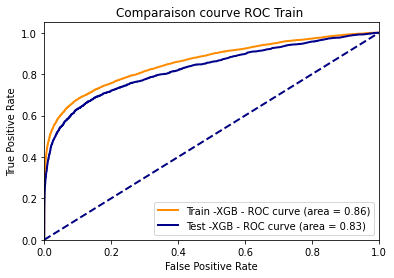

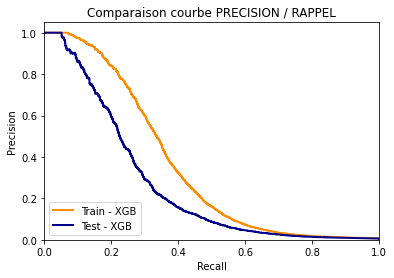

In [120]:
#Calcul des métriques

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(Y_train, xgb_clf.predict_proba(X_train2)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

plt.figure()
lw = 2
plt.plot(fpr_train_XGB, tpr_train_XGB, color='darkorange',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)
plt.plot(fpr_test_XGB, tpr_test_XGB, color='darkblue',
         lw=lw, label='Test -XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(Y_train,
                                                                         xgb_clf.predict_proba(X_train2)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(Y_test,
                                                                         xgb_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_XGB,precision_train_XGB, color='darkorange',
         lw=lw, label='Train - XGB')
plt.plot(recall_test_XGB,precision_test_XGB, color='darkblue',
         lw=lw, label='Test - XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [122]:
Y_pred3=xgb_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))

[[343178     78]
 [  1891    283]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    343256
           1       0.78      0.13      0.22      2174

    accuracy                           0.99    345430
   macro avg       0.89      0.56      0.61    345430
weighted avg       0.99      0.99      0.99    345430

